<a href="https://colab.research.google.com/github/DeBanner/Geospatial-works/blob/main/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GeoInternship Assessment Solutions

#### (by Adeyemo Barnabas)

In [1]:
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [3]:
ngmap = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/Admin/nga_polbnda_adm1_1m_salb.shp')

In [4]:
ngmap[:10]

,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,HRparent,Shape_Leng,Shape_Area,geometry
0,Nigeria,NGA,Abia,NGA001,NG001,4.544712,0.396427,"POLYGON ((7.40442 6.01240, 7.41584 6.00622, 7...."
1,Nigeria,NGA,Adamawa,NGA002,NG002,12.325359,3.129146,"POLYGON ((13.66988 10.94469, 13.68840 10.94465..."
2,Nigeria,NGA,Akwa lbom,NGA003,NG003,3.999998,0.549834,"MULTIPOLYGON (((8.33286 4.58996, 8.32003 4.588..."
3,Nigeria,NGA,Anambra,NGA004,NG004,3.472342,0.388930,"POLYGON ((6.93254 6.71090, 6.93167 6.69870, 6...."
4,Nigeria,NGA,Bauchi,NGA005,NG005,13.863192,3.983724,"POLYGON ((10.72652 12.43089, 10.72507 12.40556..."
5,Nigeria,NGA,Bayelsa,NGA006,NG006,5.096533,0.763938,"MULTIPOLYGON (((5.74689 4.49148, 5.74573 4.488..."
6,Nigeria,NGA,Benue,NGA007,NG007,8.995074,2.519246,"POLYGON ((8.84186 8.06709, 8.91085 8.05626, 8...."
7,Nigeria,NGA,Borno,NGA008,NG008,14.337576,6.024741,"POLYGON ((13.33199 13.71460, 13.33813 13.71435..."
8,Nigeria,NGA,Cross River,NGA009,NG009,8.006462,1.713022,"MULTIPOLYGON (((8.30513 4.79617, 8.30031 4.795..."
9,Nigeria,NGA,Delta,NGA010,NG010,7.476531,1.398127,"POLYGON ((6.66892 6.50123, 6.67111 6.48484, 6...."


In [5]:
type(ngmap)

geopandas.geodataframe.GeoDataFrame

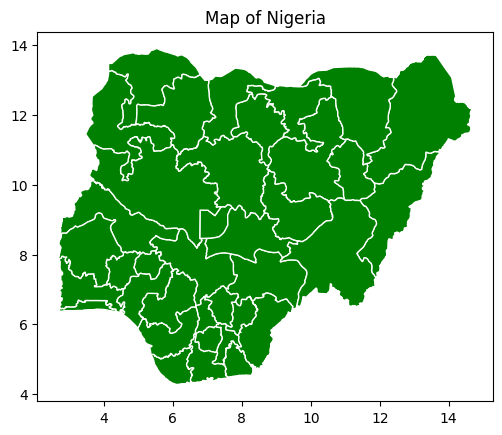

In [6]:
ngmap.plot(edgecolor='white', color= 'green')
plt.title('Map of Nigeria');

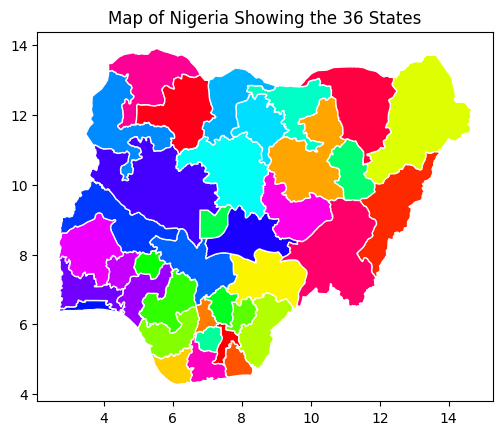

In [7]:
ngmap.plot(edgecolor='white', cmap='hsv', column= 'ADM1_NAME')
plt.title('Map of Nigeria Showing the 36 States');

In [8]:
ngmap2 = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/Admin/nga_polbndl_adm1_1m_salb.shp')
ngmap2[:10]

,Shape_Leng,geometry
0,0.416490,"LINESTRING (7.59159 4.49217, 7.58733 4.49484, ..."
1,0.782269,"LINESTRING (7.48871 4.82180, 7.48728 4.82467, ..."
2,0.904617,"LINESTRING (7.88037 5.36680, 7.88133 5.36260, ..."
3,1.679614,"LINESTRING (5.37332 5.13627, 5.39039 5.13420, ..."
4,1.557125,"LINESTRING (6.55283 5.37988, 6.56198 5.37925, ..."
5,0.067406,"LINESTRING (6.48548 5.37921, 6.50060 5.37940, ..."
6,1.110941,"LINESTRING (7.71063 5.51935, 7.70777 5.51875, ..."
7,0.280151,"LINESTRING (7.88037 5.36680, 7.87798 5.36705, ..."
8,0.466339,"LINESTRING (7.89010 5.68480, 7.89329 5.68227, ..."
9,1.096068,"LINESTRING (7.26392 5.21561, 7.26011 5.21333, ..."


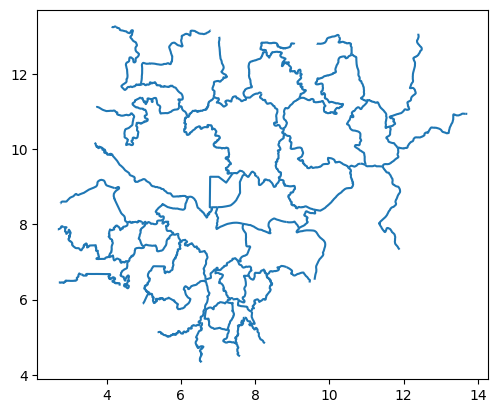

In [9]:
ngmap2.plot();

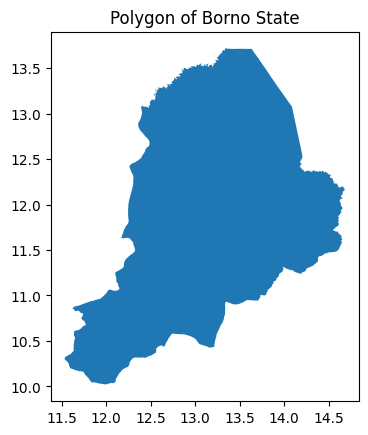

In [10]:
state_polygon = ngmap[ngmap['ADM1_NAME'] == 'Borno']
state_polygon.plot()
plt.title('Polygon of Borno State');

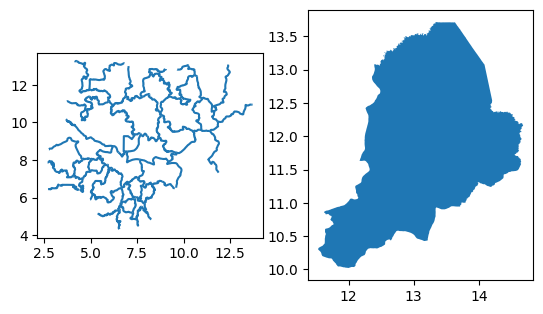

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ngmap2.plot(ax=ax1)
state_polygon.plot(ax=ax2);

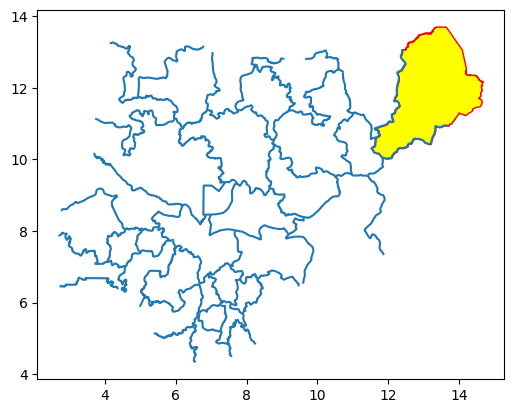

In [12]:
fig, ax = plt.subplots()
state_polygon.plot(ax=ax, color= 'yellow', edgecolor= 'red')
ngmap2.plot(ax=ax);


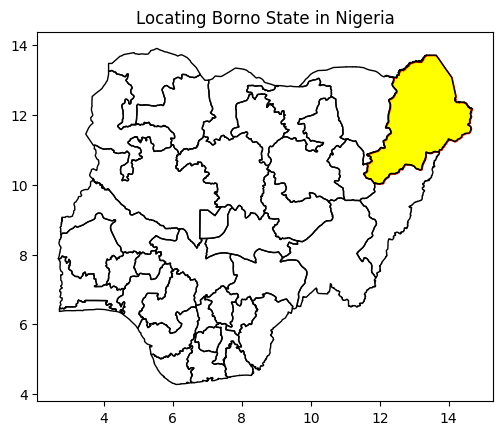

In [13]:
fig, ax = plt.subplots()
state_polygon.plot(ax=ax, color= 'yellow', edgecolor= 'red')
ngmap.plot(ax=ax, color= 'none')
plt.title('Locating Borno State in Nigeria');

In [14]:
ngnode = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/Nigeria Health Facilities/Nigeria-node.shp')

In [15]:
ngnode

,osm_id,amenity,healthcare,name,operator,source,speciality,operator_t,contact_nu,operationa,...,water_sour,electricit,is_in_heal,url,addr_house,addr_stree,addr_postc,addr_city,changeset_,geometry
0,1611132419,pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xybot,POINT (7.57510 9.01089)
1,1754869254,pharmacy,NaN,Zuman Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Maiduguri Road,NaN,NaN,MuhdLawal,POINT (7.43352 10.50774)
2,1754889379,pharmacy,pharmacy,Nasiru Dokta Chemist,NaN,NaN,NaN,NaN,NaN,operational,...,groundwater,grid,NaN,NaN,AZ 33,Daura Road,10B X,Dadi Riba,MuhdLawal,POINT (7.43351 10.50965)
3,1842624277,pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andy Melnikov,POINT (6.60436 7.56117)
4,1880807484,pharmacy,NaN,Suleiko Pharmacy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12,Ahmadu Bello Way off Jos Road,NaN,NaN,MuhdLawal,POINT (7.43075 10.51406)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,10759282336,pharmacy,pharmacy,Keecee Pharmacy,NaN,Nigerian Red Cross Society,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PaulKnight,POINT (7.44351 8.94488)
3326,10759309998,clinic,clinic,Kabusa Healthcare,NaN,Nigerian Red Cross Society,NaN,government,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PaulKnight,POINT (7.44134 8.94968)
3327,10771307982,clinic,clinic,Safeside Clinic and Maternity,NaN,Nigerian Red Cross Society,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ugwugba Village,NaN,NaN,PaulKnight,POINT (6.75276 5.55609)
3328,9911408019,pharmacy,pharmacy,NaN,NaN,nigeriase4all.gov.ng,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qitay,POINT (8.84147 5.63244)


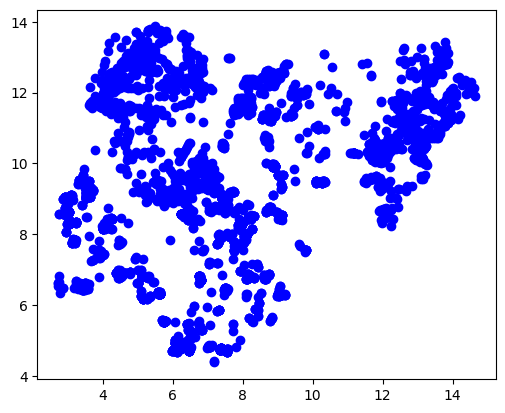

In [16]:
ngnode.plot(color='blue');

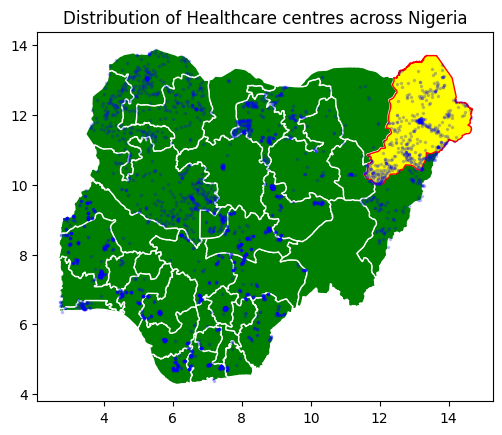

In [17]:
fig, ax = plt.subplots()
ngmap.plot(ax=ax, color= 'green', edgecolor= 'white')
state_polygon.plot(ax=ax, color= 'yellow', edgecolor= 'red')
ngnode.plot(ax=ax, color= 'blue', alpha= 0.2, markersize= 2.5)
plt.title('Distribution of Healthcare centres across Nigeria');

In [18]:
nodeconv = ngnode.to_crs(ngmap.crs)
node_borno = gpd.sjoin(nodeconv, ngmap, predicate='intersects')
centrecount = node_borno.groupby('ADM1_NAME')
centrecount.size()

ADM1_NAME
Adamawa                      121
Akwa lbom                     17
Anambra                        2
Bauchi                        27
Bayelsa                       77
Benue                        101
Borno                        445
Cross River                   68
Delta                         50
Ebonyi                         3
Edo                           84
Enugu                         83
Federal Capital Territory     62
Gombe                         24
Imo                           33
Jigawa                        78
Kaduna                        36
Kano                         205
Katsina                        7
Kebbi                        140
Kogi                         114
Kwara                         93
Lagos                         50
Nasarawa                     166
Niger                        255
Ogun                          38
Ondo                          56
Osun                           6
Oyo                          248
Plateau                      238


In [19]:
import pandas as pd
df = pd.DataFrame(centrecount.size(), columns=['No of Healthcare centres'])
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/healthcare centers.csv')


In [20]:
ngway = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/Nigeria Health Facilities/Nigeria-way.shp')

<Axes: >

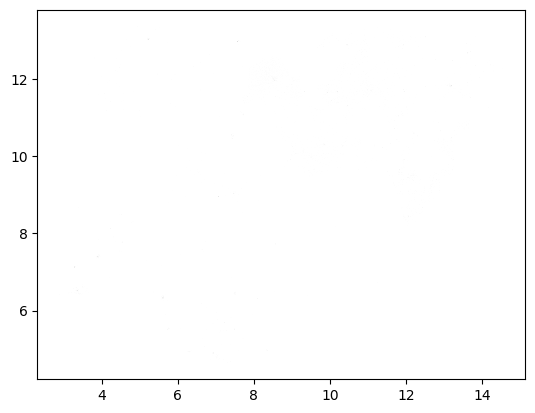

In [21]:
ngway.plot(color='black')

In [22]:
conflicts = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/2020-06-10-2022-12-31-Western_Africa-Nigeria.csv')
conflicts.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,geometry
0,NIG29371,31 December 2022,2022,1,Political violence,Battles,Armed clash,Military Forces of Nigeria (2015-2023),Civilian JTF: Civilian Joint Task Force,1,...,11.8312,13.1517,2,Twitter,New media,"On 31 December 2022, troops of the 199 Special...",6,,1686096181,None
1,NIG29512,31 December 2022,2022,1,Political violence,Battles,Armed clash,Military Forces of Nigeria (2015-2023),,1,...,11.156,12.7576,2,"Risk and Strategic Management, Corporation",Local partner-International,"On 31 December 2022, Troops of Operation HADIN...",6,,1686096181,None
2,NIG29407,30 December 2022,2022,1,Political violence,Battles,Armed clash,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,,2,...,13.6169,13.2644,2,Guardian (Nigeria); Sahara Reporters; Twitter,New media-National,"On 30 December 2022, a large number of Boko Ha...",30,,1673311013,None
3,NIG29561,30 December 2022,2022,1,Political violence,Violence against civilians,Abduction/forced disappearance,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,,2,...,11.6558,13.4213,2,Twitter,New media,"On 30 December 2022, Boko Haram [JAS] militant...",0,,1673899227,None
4,NIG29349,27 December 2022,2022,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Nigeria (2015-2023),,1,...,11.6855,13.7607,2,Daily Leadership (Nigeria); Daily Post (Nigeri...,New media-National,"On 27 December 2022, the Nigerian Air Force ca...",28,,1686096181,None


In [23]:

conflicts.describe()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,geometry
count,777,777,777,777,777,777,777,777,777,777,...,777,777,777,777,777,777,777,777,777,0
unique,777,452,3,3,2,4,10,19,13,5,...,247,248,3,227,14,771,45,4,129,0
top,NIG29371,14 April 2022,2022,1,Political violence,Battles,Armed clash,Islamic State (West Africa) - Lake Chad Factio...,,2,...,11.8312,13.1517,2,"Risk and Strategic Management, Corporation",National,"On 13 June 2020, Boko Haram attacked Felo, Zow...",0,,1686096166,NaN
freq,1,10,333,665,775,450,448,331,714,470,...,49,49,412,144,272,3,261,768,64,NaN


In [ ]:
#conflicts.fillna(method='ffill')

In [24]:
m = folium.Map([9.081999, 8.675277], zoom_start=6, tiles='Stamen Terrain')
folium.GeoJson(ngmap.to_json()).add_to(m)
m

In [ ]:
#m = folium.Map([9.081999, 8.675277], zoom_start=6, tiles='Stamen Terrain')
#folium.GeoJson(ngmap.to_json()).add_to(m)
#folium.GeoJson(ngnode.to_json()).add_to(m)
#m

In [25]:
long = ngnode.geometry.x
lat = ngnode.geometry.y

In [26]:
import plotly.express as px

fig = px.scatter_mapbox(ngnode, lat= lat, lon= long, hover_name='name',
                        hover_data=['name'], zoom=6, opacity=0.8)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(title_text='Health Centre Distributions Across Nigeria- Responsive Plot')
fig.show()

In [27]:
conflicts.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'geometry'],
      dtype='object')

In [28]:
long = conflicts['longitude'].astype(float)
lat = conflicts['latitude'].astype(float)
fatal = conflicts['fatalities'].astype(int)

In [29]:
fig = px.scatter_mapbox(conflicts, lat=lat, lon=long, size= fatal,
                        hover_data=['year', 'fatalities'],
                        color='event_type', zoom=5, opacity=0.5)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(title_text='Geo-points of insecurities in Borno State')
fig.show()

In [ ]:
genpop = gpd.read_file(r'/content/drive/MyDrive/Colab Notebooks/ng_general_2020.csv')
genpop.head()

,longitude,latitude,nga_general_2020,geometry
0,12.060972222376677,13.49986111106459,20.089389,None
1,12.061250000154454,13.49986111106459,20.089389,None
2,12.061527777932232,13.49986111106459,20.089389,None
3,12.061805555710013,13.49986111106459,20.089389,None
4,12.062083333487788,13.49986111106459,20.089389,None
